In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

import tensorflow as tf
import keras as ks

#Import two datasets
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")
print(train_df.shape)
print(test_df.shape)

#Making the two datasets into one so we can split it up how we want ^_^
full_df = pd.concat([train_df, test_df], ignore_index=True)
print(full_df.shape)

(27455, 785)
(7172, 785)
(34627, 785)


In [7]:
#Split the data into x and y variables
X = full_df.drop(columns="label")
y = full_df["label"]


In [ ]:
#Printing out how a row of data looks

full_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
#Showing the amount of labels that exist (hand signals)
full_df.value_counts(["label"])

label
0        1457
4        1455
2        1454
5        1451
11       1450
24       1450
8        1450
7        1449
12       1449
18       1445
10       1445
16       1443
14       1442
13       1442
1        1442
3        1441
6        1438
17       1438
15       1435
19       1434
23       1431
22       1431
21       1428
20       1427
Name: count, dtype: int64

Text(0.5, 1.0, 'Hand label distribution in full dataset')

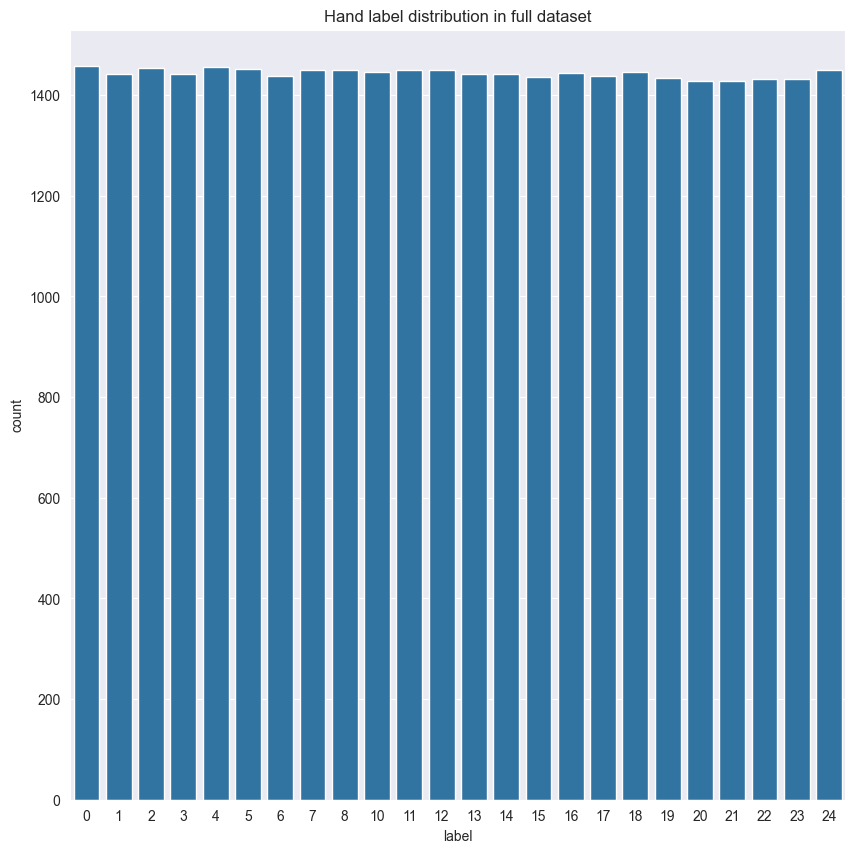

In [ ]:
#Showing the distribution over hand labels

plt.figure(figsize= (10, 10))
sns.set_style('darkgrid')
sns.countplot(x='label', data=full_df)
plt.title("Hand label distribution in full dataset")

In [ ]:
#Looking on each rows to see after label index if the entire row are 0 in pixels
pixel_columns = full_df.columns[1:]

all_zero_rows = full_df[pixel_columns].eq(0).all(axis=1)

print("Number of rows where all pixels are 0:", all_zero_rows.sum())

Number of rows where all pixels are 0: 0
